In [2]:
#!/usr/bin/python

import sys
import pickle
import os
import pandas as pd
import sklearn
import numpy as np
sys.path.append(os.path.abspath(("../tools/")))

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

In [3]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

In [4]:
### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [5]:
# Change data dictionary to pandas DataFrame
df = pd.DataFrame.from_records(list(data_dict.values()))
persons = pd.Series(list(data_dict.keys()))

print(persons.head())
print(df.head())

0          METTS MARK
1       BAXTER JOHN C
2      ELLIOTT STEVEN
3    CORDES WILLIAM R
4      HANNON KEVIN P
dtype: object
   salary to_messages deferral_payments total_payments loan_advances    bonus  \
0  365788         807               NaN        1061827           NaN   600000   
1  267102         NaN           1295738        5634343           NaN  1200000   
2  170941         NaN               NaN         211725           NaN   350000   
3     NaN         764               NaN            NaN           NaN      NaN   
4  243293        1045               NaN         288682           NaN  1500000   

              email_address restricted_stock_deferred deferred_income  \
0      mark.metts@enron.com                       NaN             NaN   
1                       NaN                       NaN        -1386055   
2  steven.elliott@enron.com                       NaN         -400729   
3     bill.cordes@enron.com                       NaN             NaN   
4    kevin.hannon@enron.

In [6]:
# dataframe dimension
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   salary                     146 non-null    object
 1   to_messages                146 non-null    object
 2   deferral_payments          146 non-null    object
 3   total_payments             146 non-null    object
 4   loan_advances              146 non-null    object
 5   bonus                      146 non-null    object
 6   email_address              146 non-null    object
 7   restricted_stock_deferred  146 non-null    object
 8   deferred_income            146 non-null    object
 9   total_stock_value          146 non-null    object
 10  expenses                   146 non-null    object
 11  from_poi_to_this_person    146 non-null    object
 12  exercised_stock_options    146 non-null    object
 13  from_messages              146 non-null    object
 14  other     

In [7]:
print(data_dict.keys())

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [8]:
# convert to numpy.nan
df.replace(to_replace='NaN', value=np.nan, inplace=True)

# count number of nan for columns
print(df.isnull().sum())

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64


In [9]:
# remove column from df if null counter > 65
for column, series in df.iteritems():
    if series.isnull().sum() > 65:
        df.drop(column, axis=1, inplace=True)

# remove email address column
if 'email_address' in list(df.columns.values):
    df.drop('email_address', axis=1, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   salary                   95 non-null     float64
 1   to_messages              86 non-null     float64
 2   total_payments           125 non-null    float64
 3   bonus                    82 non-null     float64
 4   total_stock_value        126 non-null    float64
 5   expenses                 95 non-null     float64
 6   from_poi_to_this_person  86 non-null     float64
 7   exercised_stock_options  102 non-null    float64
 8   from_messages            86 non-null     float64
 9   other                    93 non-null     float64
 10  from_this_person_to_poi  86 non-null     float64
 11  poi                      146 non-null    bool   
 12  shared_receipt_with_poi  86 non-null     float64
 13  restricted_stock         110 non-null    float64
dtypes: bool(1), float64(13)
me

In [11]:
# Impute the missing values
df_imp = df.replace(to_replace=np.nan, value=0)
df_imp = df.fillna(0).copy(deep=True)
df_imp.columns = list(df.columns.values)

print(df_imp.isnull().sum())
print(df_imp.head())

df_imp.describe()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
from_poi_to_this_person    0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
dtype: int64
     salary  to_messages  total_payments      bonus  total_stock_value  \
0  365788.0        807.0       1061827.0   600000.0           585062.0   
1  267102.0          0.0       5634343.0  1200000.0         10623258.0   
2  170941.0          0.0        211725.0   350000.0          6678735.0   
3       0.0        764.0             0.0        0.0          1038185.0   
4  243293.0       1045.0        288682.0  1500000.0          6391065.0   

   expenses  from_poi_to_this_person  exercised_stock_options  from_messages  \
0   94299.0                     38.0                    

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,shared_receipt_with_poi,restricted_stock
count,1.460000e+02,146.000000,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,146.000000,1.460000e+02,146.000000,1.460000e+02,146.000000,146.000000,1.460000e+02
mean,3.658114e+05,1221.589041,4.350622e+06,1.333474e+06,5.846018e+06,7.074827e+04,38.226027,4.182736e+06,358.602740,5.854318e+05,24.287671,692.986301,1.749257e+06
std,2.203575e+06,2226.770637,2.693448e+07,8.094029e+06,3.624681e+07,4.327163e+05,73.901124,2.607040e+07,1441.259868,3.682345e+06,79.278206,1072.969492,1.089995e+07
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,-4.409300e+04,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-2.604490e+06
25%,0.000000e+00,0.000000,9.394475e+04,0.000000e+00,2.288695e+05,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,8.115000e+03
50%,2.105960e+05,289.000000,9.413595e+05,3.000000e+05,9.659550e+05,2.018200e+04,2.500000,6.082935e+05,16.500000,9.595000e+02,0.000000,102.500000,3.605280e+05
75%,2.708505e+05,1585.750000,1.968287e+06,8.000000e+05,2.319991e+06,5.374075e+04,40.750000,1.714221e+06,51.250000,1.506065e+05,13.750000,893.500000,8.145280e+05
max,2.670423e+07,15149.000000,3.098866e+08,9.734362e+07,4.345095e+08,5.235198e+06,528.000000,3.117640e+08,14368.000000,4.266759e+07,609.000000,5521.000000,1.303223e+08


In [12]:
# drop row for 'THE TRAVEL AGENCY IN THE PARK'
park_index = list(data_dict.keys()).index('THE TRAVEL AGENCY IN THE PARK')
print(park_index)
df_imp_sub = df_imp.drop(df_imp.index[[park_index]])

100


In [13]:
df_imp_sub.isnull().sum()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
from_poi_to_this_person    0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
dtype: int64

In [14]:
lockhart_index = list(data_dict.keys()).index('LOCKHART EUGENE E')
print(data_dict['LOCKHART EUGENE E'])
df_imp_sub = df_imp.drop(df_imp.index[[lockhart_index]])


{'salary': 'NaN', 'to_messages': 'NaN', 'deferral_payments': 'NaN', 'total_payments': 'NaN', 'loan_advances': 'NaN', 'bonus': 'NaN', 'email_address': 'NaN', 'restricted_stock_deferred': 'NaN', 'deferred_income': 'NaN', 'total_stock_value': 'NaN', 'expenses': 'NaN', 'from_poi_to_this_person': 'NaN', 'exercised_stock_options': 'NaN', 'from_messages': 'NaN', 'other': 'NaN', 'from_this_person_to_poi': 'NaN', 'poi': False, 'long_term_incentive': 'NaN', 'shared_receipt_with_poi': 'NaN', 'restricted_stock': 'NaN', 'director_fees': 'NaN'}


In [15]:
# Rename dataframe name after cleaning up NaN and outlier
enron_df = df_imp_sub

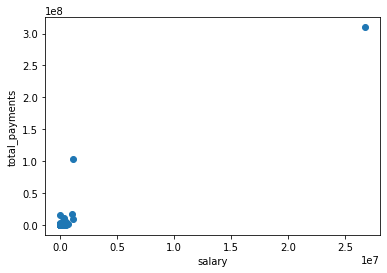

In [16]:
# Graph for features

import matplotlib.pyplot as plt

plt.scatter(enron_df['salary'], enron_df['total_payments'])
plt.xlabel("salary")
plt.ylabel("total_payments")
plt.show()

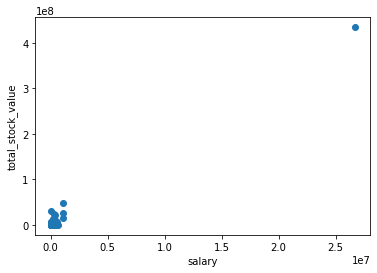

In [17]:
plt.scatter(enron_df['salary'], enron_df['total_stock_value'])
plt.xlabel("salary")
plt.ylabel("total_stock_value")
plt.show()

In [18]:
enron_df[enron_df['total_stock_value'].isnull()]

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock


In [19]:
#Create new features 'salary_of_total_payment' and 'salary_of_total_stock_value'\n",
enron_df['salary_of_total_payments'] = 0.0
enron_df['salary_of_total_stock_value'] = 0.0
enron_df.loc[enron_df['total_payments'] != 0.0,'salary_of_total_payments'] = enron_df['salary'] / enron_df['total_payments'] * 100
enron_df.loc[enron_df['total_stock_value'] != 0.0,'salary_of_total_stock_value'] = enron_df['salary'] / enron_df['total_stock_value'] * 100

In [20]:
enron_df.head()

,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value
0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,0.0,29.0,1740.0,1.0,False,702.0,585062.0,34.448926,62.521237
1,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,False,0.0,3942714.0,4.740606,2.514313
2,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,4890344.0,0.0,12961.0,0.0,False,0.0,1788391.0,80.737277,2.559482
3,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,651850.0,12.0,0.0,0.0,False,58.0,386335.0,0.000000,0.000000
4,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,5538001.0,32.0,11350.0,21.0,True,1035.0,853064.0,84.277163,3.806768


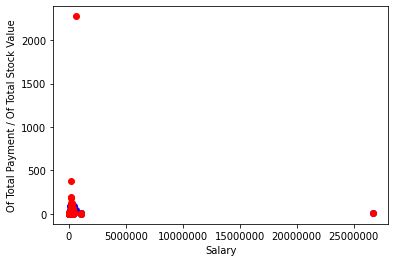

In [21]:
# Graph 'salary_of_total_payment' and 'salary_of_total_stock_value' to salary

plt.ticklabel_format(style = 'plain')
plt.scatter(enron_df['salary'], enron_df['salary_of_total_payments'], color='blue')
plt.scatter(enron_df['salary'], enron_df['salary_of_total_stock_value'], color='red')
plt.xlabel('Salary')
plt.ylabel('Of Total Payment / Of Total Stock Value')
plt.show()

In [22]:
# Mark as fraud for those with outrageous compensation
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where
        each tuple is of the form (age, net_worth, error).
    """

    cleaned_data = []

    #print 'starting clean read data to tuple'
    #print 'length:', len(predictions)
    ### your code goes here
    for i in range(0, len(predictions)):
        age = ages[i][0]
        net_worth = net_worths[i][0]
        pred = predictions[i][0]
        err = net_worth - pred

        cleaned_data.append((age, net_worth, err))

    #print 'length of cleaned_data before sort:', len(cleaned_data)
    cleaned_data = sorted(cleaned_data, key=lambda x: x[2], reverse=True)[0:81]
    #print cleaned_data[-1]

    print('length of cleaned_data:', len(cleaned_data))
    return cleaned_data

In [23]:
enron_df['poi_ratio'] = 0.0
enron_df['fraction_to_poi'] = 0.0
enron_df['fraction_from_poi'] = 0.0
enron_df.loc[(enron_df['from_messages'] + enron_df['to_messages']) != 0.0, 'poi_ratio'] = (enron_df['from_poi_to_this_person'] + enron_df['from_this_person_to_poi']) / (enron_df['from_messages'] + enron_df['to_messages']) * 100
enron_df.loc[enron_df['from_messages'] != 0.0, 'fraction_to_poi'] = enron_df['from_this_person_to_poi'] / enron_df['from_messages'] * 100
enron_df.loc[enron_df['to_messages'] != 0.0, 'fraction_from_poi']= enron_df['from_poi_to_this_person'] / enron_df['to_messages'] * 100

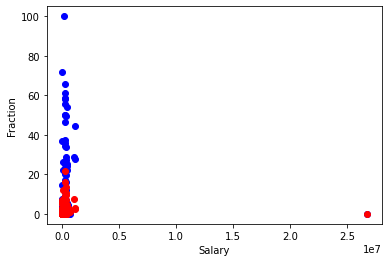

In [24]:
 # Graph 'fraction_to_poi' and 'fraction_from_poi' to salary
plt.scatter(enron_df['salary'], enron_df['fraction_to_poi'], color='blue')
plt.scatter(enron_df['salary'], enron_df['fraction_from_poi'], color='red')
plt.xlabel('Salary')
plt.ylabel('Fraction')
plt.show()

In [25]:
# move 'poi' to the first column
cols = enron_df.columns.tolist()
#print cols
cols = cols[7:8] + cols[:7] + cols[8:]
print(cols)
enron_df = enron_df[cols]
print(enron_df.columns.values)

['exercised_stock_options', 'salary', 'to_messages', 'total_payments', 'bonus', 'total_stock_value', 'expenses', 'from_poi_to_this_person', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi', 'restricted_stock', 'salary_of_total_payments', 'salary_of_total_stock_value', 'poi_ratio', 'fraction_to_poi', 'fraction_from_poi']
['exercised_stock_options' 'salary' 'to_messages' 'total_payments' 'bonus'
 'total_stock_value' 'expenses' 'from_poi_to_this_person' 'from_messages'
 'other' 'from_this_person_to_poi' 'poi' 'shared_receipt_with_poi'
 'restricted_stock' 'salary_of_total_payments'
 'salary_of_total_stock_value' 'poi_ratio' 'fraction_to_poi'
 'fraction_from_poi']


In [26]:
enron_df.columns.values

array(['exercised_stock_options', 'salary', 'to_messages',
       'total_payments', 'bonus', 'total_stock_value', 'expenses',
       'from_poi_to_this_person', 'from_messages', 'other',
       'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi',
       'restricted_stock', 'salary_of_total_payments',
       'salary_of_total_stock_value', 'poi_ratio', 'fraction_to_poi',
       'fraction_from_poi'], dtype=object)

In [27]:
enron_df.head()

,exercised_stock_options,salary,to_messages,total_payments,bonus,total_stock_value,expenses,from_poi_to_this_person,from_messages,other,from_this_person_to_poi,poi,shared_receipt_with_poi,restricted_stock,salary_of_total_payments,salary_of_total_stock_value,poi_ratio,fraction_to_poi,fraction_from_poi
0,0.0,365788.0,807.0,1061827.0,600000.0,585062.0,94299.0,38.0,29.0,1740.0,1.0,False,702.0,585062.0,34.448926,62.521237,4.665072,3.448276,4.708798
1,6680544.0,267102.0,0.0,5634343.0,1200000.0,10623258.0,11200.0,0.0,0.0,2660303.0,0.0,False,0.0,3942714.0,4.740606,2.514313,0.000000,0.000000,0.000000
2,4890344.0,170941.0,0.0,211725.0,350000.0,6678735.0,78552.0,0.0,0.0,12961.0,0.0,False,0.0,1788391.0,80.737277,2.559482,0.000000,0.000000,0.000000
3,651850.0,0.0,764.0,0.0,0.0,1038185.0,0.0,10.0,12.0,0.0,0.0,False,58.0,386335.0,0.000000,0.000000,1.288660,0.000000,1.308901
4,5538001.0,243293.0,1045.0,288682.0,1500000.0,6391065.0,34039.0,32.0,32.0,11350.0,21.0,True,1035.0,853064.0,84.277163,3.806768,4.921077,65.625000,3.062201


In [28]:
predictors = enron_df.drop('poi', axis=1).columns.values
print(predictors)

['exercised_stock_options' 'salary' 'to_messages' 'total_payments' 'bonus'
 'total_stock_value' 'expenses' 'from_poi_to_this_person' 'from_messages'
 'other' 'from_this_person_to_poi' 'shared_receipt_with_poi'
 'restricted_stock' 'salary_of_total_payments'
 'salary_of_total_stock_value' 'poi_ratio' 'fraction_to_poi'
 'fraction_from_poi']


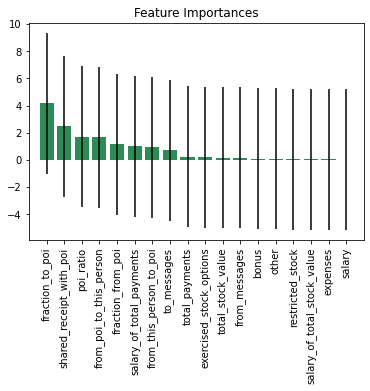

In [29]:
# Feature importances By SelectKBest

import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold
%matplotlib inline
import matplotlib.pyplot as plt

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(enron_df[predictors], enron_df["poi"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

indices = np.argsort(scores)[::-1]

sorted_important_features=[]
for i in indices:
    sorted_important_features.append(predictors[i])

# Plot the scores.  
plt.figure()
plt.title("Feature Importances")
plt.bar(range(np.size(predictors)), scores[indices],
       color="seagreen", yerr=np.std([indices]), align="center")
plt.xticks(range(np.size(predictors)), sorted_important_features, rotation='vertical')

plt.xlim([-1, np.size(predictors)])
plt.show()

In [30]:
# 13 features
predictors = ['bonus', 'exercised_stock_options', 'expenses','from_poi_to_this_person', 'from_this_person_to_poi',
 'restricted_stock', 'salary', 'shared_receipt_with_poi','total_stock_value', 'poi_ratio', 'fraction_to_poi',
 'fraction_from_poi', 'salary_of_total_payments']

# 8 features
predictors_8 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi',  'expenses', 'salary',
              'shared_receipt_with_poi', 'poi_ratio' ]

# 4 features
predictors_4 = ['bonus', 'exercised_stock_options', 'total_stock_value', 'fraction_to_poi']

In [33]:
# Split the data at first on training and test data. We will use Stratified Shuffle Split due to small dataset
labels = enron_df['poi'].copy(deep=True).astype(int).to_numpy()

#features = enron_df['total_payments', 'total_stock_value', 'poi_ratio', 'fraction_to_poi', 'fraction_from_poi'].as_matrix()
#features = (enron_df.drop('poi', axis=1)).fillna(0).copy(deep=True).as_matrix()
features = (enron_df[predictors]).fillna(0).copy(deep=True).to_numpy()

print(labels)
print(features)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1]
[[6.00000000e+05 0.00000000e+00 9.42990000e+04 ... 3.44827586e+00
  4.70879802e+00 3.44489262e+01]
 [1.20000000e+06 6.68054400e+06 1.12000000e+04 ... 0.00000000e+00
  0.00000000e+00 4.74060596e+00]
 [3.50000000e+05 4.89034400e+06 7.85520000e+04 ... 0.00000000e+00
  0.00000000e+00 8.07372771e+01]
 ...
 [6.00000000e+05 3.18125000e+06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 2.42722596e+01]
 [8.00000000e+05 7.65920000e+05 9.62680000e+04 ... 5.00000000e+01
  2.17341040e+01 3.18124829e+01]
 [6.00000000e+05 3.84728000e+05 1.25978000e+05 ... 3.75000000e+01
  5.95647194e+00 2.16127060e+01]]


In [ ]:

# # Scale feature 'salary'
# scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
# salary_scaled = scaler.fit_transform(enron_df['salary'])

In [39]:
import sklearn.preprocessing

# Assuming enron_df['salary'] contains the salary data
# Convert the salary data to a 2-dimensional array
salary_data = np.array(enron_df['salary']).reshape(-1, 1)

# Scale feature 'salary'
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 100), copy=True)
salary_scaled = scaler.fit_transform(salary_data)

# If you want to convert salary_scaled back to a 1-dimensional array
salary_scaled = salary_scaled.flatten()

# Now, salary_scaled contains the scaled salary values



Pick and Tune an Algorithm
Try out varity of classifiers (related mini-project: Lessons 1-3)
Try a varity of classifier. Please name your classifier clf for easy export below. Note that if you want to do PCA or other multi-stage operations, you'll need to use Pipelines. For more info: http://scikit-learn.org/stable/modules/pipeline.html
At least 2 different algorithms are attempted and their performance is compared, with the more performant one used in the final analysis.

In [48]:
# Try GaussianNB
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
scores = sklearn.model_selection.cross_val_score(gnb_clf, enron_df[predictors_8], labels)
print(scores)
print('GaussianNB mean score:', scores.mean())

[0.10344828 0.13793103 0.10344828 0.89655172 0.13793103]
GaussianNB mean score: 0.27586206896551724


In [46]:
# Try SVC
from sklearn.svm import SVC
svc_clf = SVC()
scores = sklearn.model_selection.cross_val_score(svc_clf, enron_df[predictors_8], labels)
print(scores)
print('SVC:', scores.mean())

[0.89655172 0.89655172 0.86206897 0.86206897 0.89655172]
SVC: 0.8827586206896552


In [50]:
# Try ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
erf_clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = sklearn.model_selection.cross_val_score(erf_clf, enron_df[predictors_8], labels)
print(scores)
print('ExtraTreesClassifier mean score:', scores.mean())

[0.89655172 0.89655172 0.86206897 0.82758621 0.86206897]
ExtraTreesClassifier mean score: 0.8689655172413792


In [51]:

# Try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10)
scores = sklearn.model_selection.cross_val_score(rf_clf, enron_df[predictors_8], labels)
print(scores)
print('RandomForestClassifier mean score:', scores.mean())

[0.86206897 0.89655172 0.86206897 0.86206897 0.79310345]
RandomForestClassifier mean score: 0.8551724137931034


In [52]:
# Try AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=100)
scores = sklearn.model_selection.cross_val_score(ab_clf, enron_df[predictors_8], labels)
print(scores)
print('AdaBoostClassifier mean score:', scores.mean())

[0.89655172 0.86206897 0.89655172 0.82758621 0.75862069]
AdaBoostClassifier mean score: 0.8482758620689654


In [53]:
# Try Logistic Regression
from sklearn.linear_model import LogisticRegression
lreg_clf = LogisticRegression()
scores = sklearn.model_selection.cross_val_score(lreg_clf, enron_df[predictors_8], labels)
print(scores) 
print('LogisticRegression mean score:', scores.mean())

[0.68965517 0.72413793 0.75862069 0.68965517 0.79310345]
LogisticRegression mean score: 0.7310344827586207


In [54]:
# Try LinearSVC
from sklearn.svm import LinearSVC
lsvc_clf = LinearSVC()
scores = sklearn.model_selection.cross_val_score(lsvc_clf, enron_df[predictors_8], labels)
print(scores)
print('LinearSVC mean score:', scores.mean())

[0.82758621 0.72413793 0.89655172 0.44827586 0.82758621]
LinearSVC mean score: 0.7448275862068965


/Users/apple/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/apple/.pyenv/versions/3.9.7/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Comparing Classifiers based on cross validation scores:

1st Tier: SVC, RandomForestClassifier

2nd Tier: GaussianNB, ExtraTreesClassifier, AdaBoostClassifier

3st Tier: LogisticRegression, LinearSVC

Univariate feature selection with F-test for feature scoring
using the default selection function: the 10% most significant features

<BarContainer object of 13 artists>

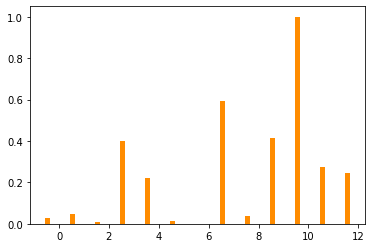

In [55]:
# Univariate feature selection with SelectPercentile
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectPercentile, f_classif

selector = SelectPercentile(f_classif, percentile=10)
selector.fit(features, labels)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

X_indices = np.arange(features.shape[-1])
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange')

In [56]:
# use FeatureUnion to combine features obtained by PCA and univariate selection ?????

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

# This dataset is way too high-dimensional. Better do PCA:
pca = PCA(n_components=8)

# Maybe some original features where good, too?
selection = SelectKBest(k=4)

# Build estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit(features, labels).transform(features)

svm = SVC(kernel="linear")

# Do grid search over k, n_components and C:
pipeline = Pipeline([("features", combined_features), ("svm", svm)])

param_grid = dict(features__pca__n_components=[1, 2, 3],
                  features__univ_select__k=[1, 2],
                  svm__C=[0.1, 1, 10])

grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(features, labels)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1


The pipeline provides a handy tool called the FeatureUnion which allows the results of multiple feature selection and extraction procedures to be combined into a larger dataset on which a model can be trained. Importantly, all the feature extraction and the feature union occurs within each fold of the cross validation procedure. The pipeline is then evaluated using 10-fold cross validation.

In [ ]:
# Create a pipeline that extracts features from the data using PCA and SelectKBest then creates a model_SVC

from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# create feature union
features_pipeline = []
features_pipeline.append(('pca', PCA(n_components=4)))
features_pipeline.append(('select_best', SelectKBest(k=8)))
feature_union = FeatureUnion(features_pipeline)

# create pipeline for rbfSVC
estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('logistic', LogisticRegression()))
estimators.append(('svc', SVC(kernel='rbf', class_weight='balanced')))
model_svc = Pipeline(estimators)

# find best fitting parameter
param_grid = {
            'svc__C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1 ],
            'svc__degree': [1, 2, 3, 4, 5]
}

grid_svc = GridSearchCV(model_svc, param_grid)
grid_svc = grid_svc.fit(features, labels)
print(grid_svc.best_estimator_)

# best fitting svc_clf
best_svc_pipe = grid_svc.best_estimator_ 

# evaluate pipeline for rbfSVC
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_svc = cross_val_score(model_svc, enron_df[predictors], labels, cv=kfold)
print('rbfSVC mean score:', scores_svc.mean())


In [ ]:
# create pipeline for RandomForest

from sklearn.ensemble import RandomForestClassifier

estimators = []
estimators.append(('feature_union', feature_union))
#estimators.append(('logistic', LogisticRegression()))
estimators.append(('RandomForest', RandomForestClassifier()))
model_rf = Pipeline(estimators)

#print sorted(model_rf.get_params().keys())
#['RandomForest', 'RandomForest__bootstrap', 'RandomForest__class_weight', 'RandomForest__criterion', 
#'RandomForest__max_depth', 'RandomForest__max_features', 'RandomForest__max_leaf_nodes', 
#'RandomForest__min_impurity_split', 'RandomForest__min_samples_leaf', 'RandomForest__min_samples_split', 
#'RandomForest__min_weight_fraction_leaf', 'RandomForest__n_estimators', 'RandomForest__n_jobs', 
#'RandomForest__oob_score', 'RandomForest__random_state', 'RandomForest__verbose', 'RandomForest__warm_start', 
#'feature_union', 'feature_union__n_jobs', 'feature_union__pca', 'feature_union__pca__copy', 
#'feature_union__pca__iterated_power', 'feature_union__pca__n_components', 'feature_union__pca__random_state', 
#'feature_union__pca__svd_solver', 'feature_union__pca__tol', 'feature_union__pca__whiten', 
#'feature_union__select_best', 'feature_union__select_best__k', 'feature_union__select_best__score_func', 
#'feature_union__transformer_list', 'feature_union__transformer_weights', 'steps']


# find best fitting parameter
param_grid = {'RandomForest__n_estimators': [10,20,30,40,50],
               'RandomForest__min_samples_split' :[2,3,4,5],
               'RandomForest__min_samples_leaf' : [1,2,3]
             }

grid_rf = GridSearchCV(model_rf, param_grid)
grid_rf = grid_rf.fit(features, labels)
print(grid_rf.best_estimator_)

# best fitting svc_clf
best_rf_pipe = grid_rf.best_estimator_ 


# evaluate pipeline for rf
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
scores_rf = cross_val_score(model_rf, enron_df[predictors], labels, cv=kfold)
print('RandomForest mean score:', scores_rf.mean())

Tune the algorithm (related mini-project: Lessons 2, 3, 13)
At least one important parameter tuned with at least 3 settings investigated systematically, or any of the following are true:
GridSearchCV used for parameter tuning,

Several parameters tuned,

Parameter tuning incorporated into algorithm selection (i.e. parameters tuned for more than one algorithm, and best algorithm-tune combination selected for final analysis).

In [ ]:
# Find best fit param for rbf SVM with PCA and cross validation

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Compute a PCA
n_comp = 4
pca = PCA(n_components=n_comp).fit(features)
features_transformed = pca.transform(features)
features_pca = pca.components_
print('features_transformed[0]:', features_transformed[0])
print('features_pca[0]:', features_pca[0])

# Train a SVM classification model
param_grid = {
            'C': [1e3, 5e3, 1e4, 5e4, 1e5],
            'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1 ],
            'degree': [1, 2, 3, 4, 5]
}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(features_transformed, labels)
pred_svc = clf.predict(features_transformed)

print(clf.best_estimator_)
best_svc_clf = clf.best_estimator_ 


scores = sklearn.model_selection.cross_val_score(best_svc_clf, features, labels)
print('SVC after PCA mean score:', scores.mean())

# n_comp, Mean score
# 8, 0.887411347518
# 4, 0.887411347518

pred_svc = SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False).fit(features_transformed, labels).predict(features_transformed)

print(pred_svc)

In [ ]:
# get the best fitting parameters for RandomForest
#from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Compute a PCA
#n_comp = 8
#pca = PCA(n_components=n_comp).fit(features)
#features_pca = pca.transform(features)

#cv = KFold(n_splits=5)

parameters = {'n_estimators': [10,20,30,40,50],
               'min_samples_split' :[2,3,4,5],
               'min_samples_leaf' : [1,2,3]
             }

rf_clf = RandomForestClassifier()
grid_obj = GridSearchCV(rf_clf, parameters)
grid_fit = grid_obj.fit(features_pca, labels)

best_rf_clf = grid_fit.best_estimator_ 

best_rf_clf.fit(features,labels)

scores = sklearn.model_selection.cross_val_score(best_rf_clf, features, labels)
print('RandomForest mean score:', scores.mean())

Validation Strategy (related mini-project: Lesson 13)
Performance of the final algorithm selected is assessed by splitting the data into training and testing sets or through the use of cross validation, noting the specific type of validation performed. Tune your classifier to achieve better than .3 precision and recall using our testing script.
Check the tester.py script in the final project folder for details on the evaluation method, especially the test_classifier function. Because of the small size of the dataset, the script uses stratified shuffle split cross validation.

In [ ]:
# use features transformed by PCA
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features_transformed, labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print(features_transformed[0])
enron_df['poi'].tolist()[0]

In [ ]:
# prepare parameters for dump_classifier 

from collections import OrderedDict

# available choice for clf_dump: best_svc_grid, best_svc_clf, best_rf_grid, best_rf_clf
clf_dump = best_svc_clf

#features_list = list(df_imp_sub.columns.values)
#features_list = predictors
#features_list = ['salary', 'to_messages', 'salary_of_total_payments', 'total_payments', 'fraction_from_poi', 
#                 'bonus', 'poi_ratio', 'total_stock_value', 'expenses', 'fraction_to_poi', 'exercised_stock_options', 
#                 'from_messages', 'other', 'from_this_person_to_poi', 'salary_of_total_stock_value', 
#                 'shared_receipt_with_poi', 'restricted_stock', 'from_poi_to_this_person']

features_list = ['comp_1', 'comp_2', 'comp_3', 'comp_4']
poi_list = enron_df['poi'].tolist()

#data = enron_df[features_list].fillna(0).to_dict(orient='records')
#data_dict = enron_df.to_dict(orient='records')
#data_dict = features_pca.to_dict()
data_list = features_transformed

my_dataset = {}

i = 0
for item in data_list:
    elem_dict = OrderedDict()
    elem_dict['poi'] = poi_list[i]
    for j in range(len(features_list)):
        elem_dict[features_list[j]] = data_list[i][j]    
    my_dataset[i] = elem_dict
    i += 1

print(my_dataset[0])

In [ ]:
pred = best_svc_clf.predict(features_test)
acc = accuracy_score(labels_test, pred)

print("Validating algorithm:")
print("accuracy after tuning = ", acc)

# function for calculation ratio of true positives
# out of all positives (true + false)
print('precision = ', precision_score(labels_test,pred))

# function for calculation ratio of true positives
# out of true positives and false negatives
print('recall = ', recall_score(labels_test,pred))

Dump your classifier, dataset, and features_list for checking
Dump your classifier, dataset, and features_list so anyone cancheck your results. You do not need to change anything below, but make sure that the version of poi_id.py that you submit can be run on its own and generates the necessary .pkl files for validating your results.

In [ ]:
pickle.dump(clf_dump, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )